In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [14]:
telcomdata=pd.read_csv("Churn.csv")

In [15]:
telcomdata['TotalCharges']=pd.to_numeric(telcomdata['TotalCharges'],errors="coerce")
telcomdata.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
telcomdata.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telcomdata = telcomdata.dropna()

In [18]:
print(list(telcomdata.columns))
print("-"*40)
print(telcomdata.shape)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
----------------------------------------
(7032, 21)


In [19]:
round(telcomdata[['tenure','MonthlyCharges','TotalCharges']].describe(),1)

,tenure,MonthlyCharges,TotalCharges
count,7032.0,7032.0,7032.0
mean,32.4,64.8,2283.3
std,24.5,30.1,2266.8
min,1.0,18.2,18.8
25%,9.0,35.6,401.4
50%,29.0,70.4,1397.5
75%,55.0,89.9,3794.7
max,72.0,118.8,8684.8


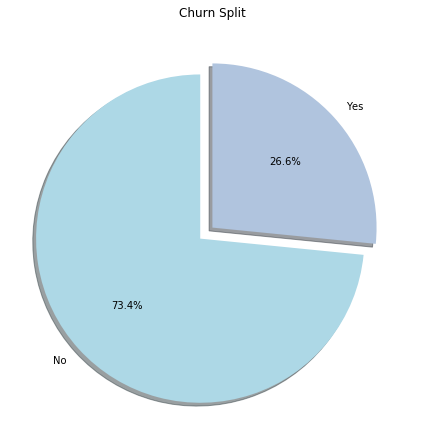

In [20]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*Counter(telcomdata["Churn"]).items())
colors = ['lightblue', 'lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

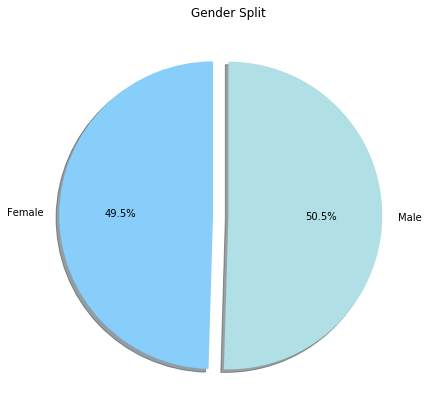

In [21]:
labels, values = zip(*Counter(telcomdata["gender"]).items())
colors = ['lightskyblue', 'powderblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()

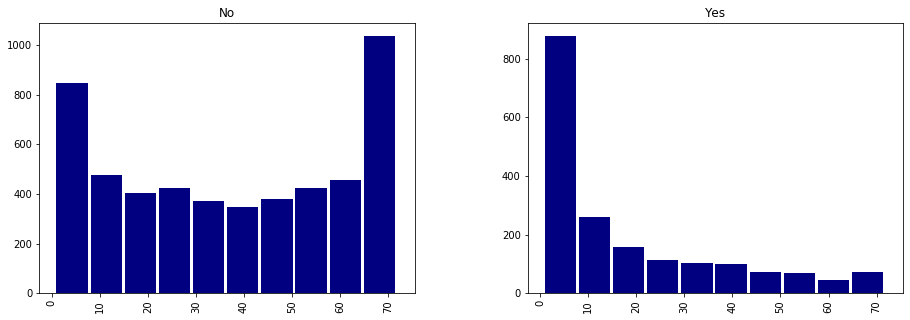

In [22]:
fig=telcomdata['tenure'].hist(by=telcomdata['Churn'],figsize=(15,5),width=6.5, color='navy' )
plt.show()

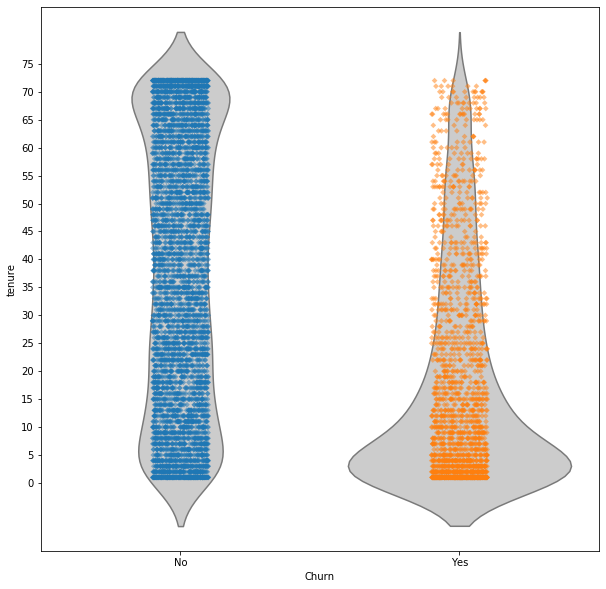

In [23]:
plt.subplots(figsize=(10,10))

g = sns.violinplot(x="Churn", y="tenure", data=telcomdata, inner=None,color="0.8")
g = sns.stripplot(x="Churn", y="tenure", data=telcomdata, jitter=True, marker="D", size=4, alpha=0.5,edgecolor="gray")

g.set_yticks(np.arange(0,80,5))
g

In [24]:
telcomdata = telcomdata.apply(LabelEncoder().fit_transform)
telcomdata = telcomdata.drop('customerID',axis=1)
telcomdata.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1


In [25]:
telcomdata.corr(method="pearson")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013929,-0.000579,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219210,0.107202,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.107482,0.342319,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.105948,0.081626,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.267182,0.871680,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.271652,0.085934,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.445006,0.463532,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.243738,-0.209762,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.044322,0.246996,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.141519,0.352453,-0.195290


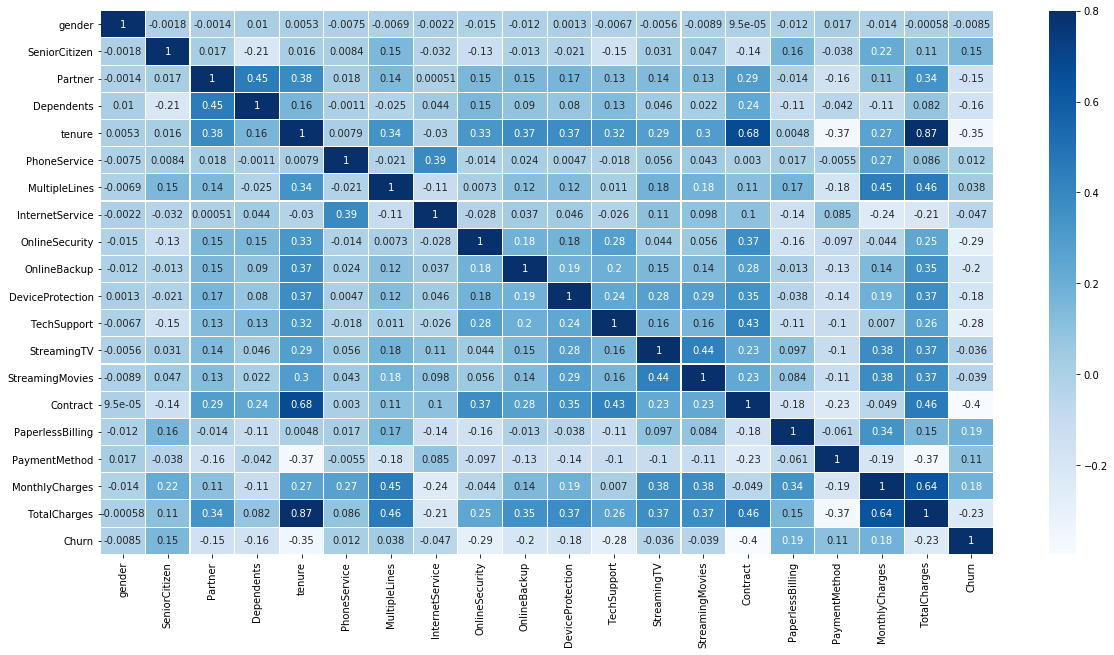

In [26]:
# Correlation Plot
corrmat = telcomdata.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
colormap = plt.cm.Blues
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

In [27]:
#Splitting the data into features & target

X = telcomdata.iloc[:,:-2]
y = telcomdata[["Churn"]]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)
#scaling the data

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [29]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(X_train_std,y_train)
importances = rfc.feature_importances_

f_importances = pd.Series(importances, telcomdata.columns[:-2])
f_importances.sort_values(ascending=False, inplace=True)
f_importances

MonthlyCharges      0.233021
tenure              0.225098
Contract            0.087561
PaymentMethod       0.063334
TechSupport         0.047610
OnlineSecurity      0.047193
gender              0.033516
OnlineBackup        0.030724
PaperlessBilling    0.029269
Partner             0.027679
DeviceProtection    0.026863
MultipleLines       0.026073
InternetService     0.025465
SeniorCitizen       0.025406
Dependents          0.023294
StreamingMovies     0.021250
StreamingTV         0.020435
PhoneService        0.006208
dtype: float64

Optimal number of features : 16


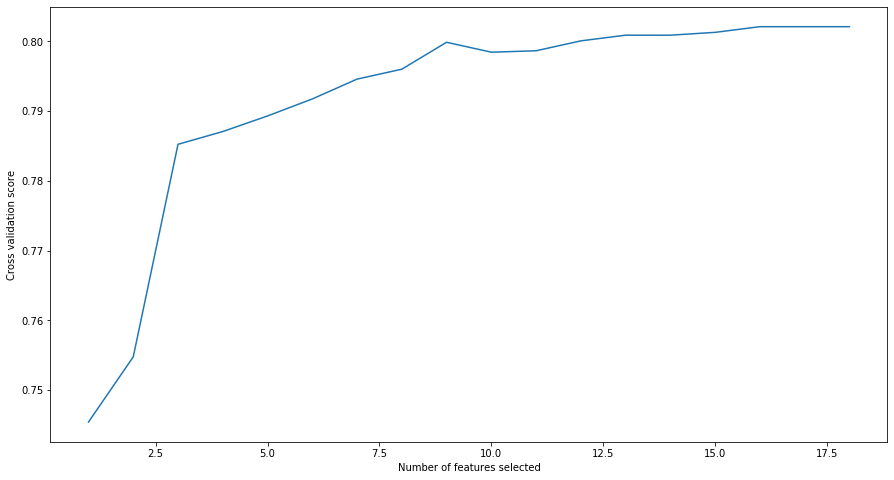

In [30]:
lr = LogisticRegression(penalty="l1",C=.1,random_state=0)

selector = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
selector.fit(X_train_std, y_train)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [31]:
lr = LogisticRegression(penalty="l1",C=.1,random_state=0)
lr.fit(X_train_std,y_train)

y_pred_lr = lr.predict(X_test_std)

train_acc_log = round((lr.score(X_train_std, y_train))*100,1)
test_acc_log = round((lr.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_log)
print('Test accuracy: %s %%' % test_acc_log)

Training accuracy: 80.5 %
Test accuracy: 80.7 %


In [34]:
from sklearn.metrics import roc_curve

preds = lr.predict_proba(X_test_std)[:,1]
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test, preds)
roc_data = pd.DataFrame(dict(fpr=fpr_lr,tpr=tpr_lr))
auc_lr = round(metrics.auc(fpr_lr,tpr_lr),2)
X_arr = X.values
y_arr = y.values.flatten()

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics, model_selection

predicted = model_selection.cross_val_predict(LogisticRegression(), X_arr, y_arr, cv=10)

lr_cv_score = round(metrics.accuracy_score(y_arr, predicted)*100,1)

print("Logistic Regression score after using Cross Validation (k=10) is : %s %%"% lr_cv_score)


Logistic Regression score after using Cross Validation (k=10) is : 80.5 %


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



Text(0.5, 1, 'Logistic Regression')

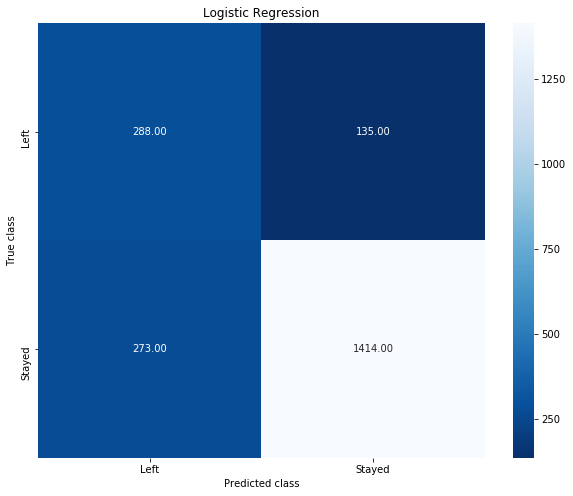

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

##Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logit_cm = metrics.confusion_matrix(y_pred_lr, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

In [36]:
print("We then tried to fit the model on the test data using Logistic Regression our model accuracy is 80.5%. As we can see, the ROC curve doesn't look that great either. However, the AUC (Area Under the curve) is 84%. The model metrics can be seen in the Precision, Recall, F1 Score. On an average, our model had around 80% Precision, Recall & F1 score. It was able to identify the churned customers better than the ones that stay.")

We then tried to fit the model on the test data using Logistic Regression our model accuracy is 80.5%. As we can see, the ROC curve doesn't look that great either. However, the AUC (Area Under the curve) is 84%. The model metrics can be seen in the Precision, Recall, F1 Score. On an average, our model had around 80% Precision, Recall & F1 score. It was able to identify the churned customers better than the ones that stay.
